In [3]:
%pip install numpy pandas matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Note: you may need to restart the kernel to use updated packages.


In [8]:
# Importing Data
data=pd.read_csv("../assets/Student_Performance.csv").head(150)
x1=data.iloc[:,2]
x2=data.iloc[:,4]
x3=data.iloc[:,5]
y=data.iloc[:,-2]
print(x1)
print(x2)
print(x3)
print(y)

0      85.93
1      83.58
2      81.84
3      72.28
4      97.48
       ...  
145    78.20
146    96.04
147    90.67
148    78.71
149    80.23
Name: Atten_Percent, Length: 150, dtype: float64
0       70.91
1       75.81
2       38.96
3       83.56
4       84.47
        ...  
145     84.35
146     51.16
147    100.00
148     89.02
149     65.44
Name: Mid_Sc, Length: 150, dtype: float64
0       70.90
1       71.52
2       52.38
3       80.49
4       62.98
        ...  
145     97.52
146     44.96
147    100.00
148     73.82
149     66.87
Name: Final_Sc, Length: 150, dtype: float64
0      68.86
1      69.29
2      50.39
3      78.81
4      72.09
       ...  
145    90.74
146    60.17
147    75.51
148    76.46
149    64.63
Name: Overall_Sc, Length: 150, dtype: float64


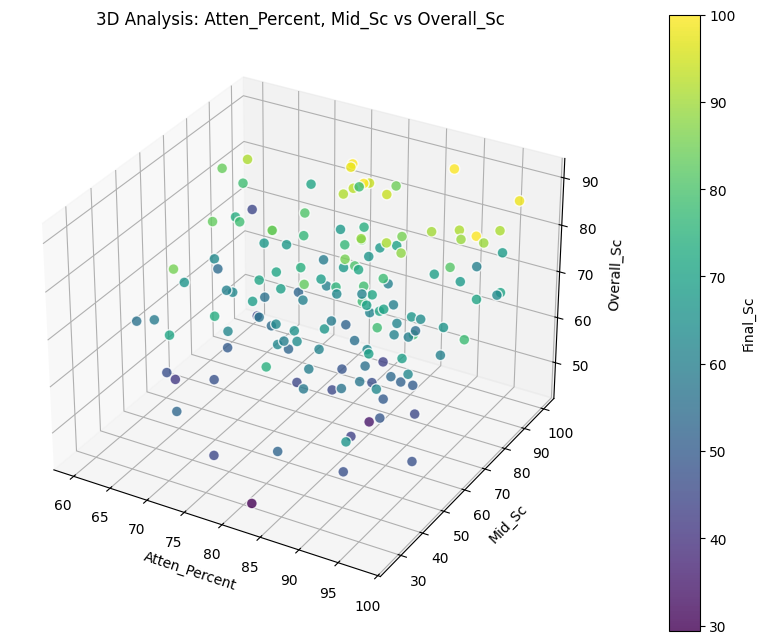

In [ ]:
# 2. Setup the figure
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# 3. Create the scatter plot
# Using 'magma' or 'viridis' helps the 4th dimension (color) pop
plot = ax.scatter(x1, x2, y, c=x3, cmap='magma', s=60, edgecolors='white', linewidth=0.5)

# 4. Labeling
ax.set_xlabel(x1.name, fontweight='bold')
ax.set_ylabel(x2.name, fontweight='bold')
ax.set_zlabel(y.name, fontweight='bold')
plt.title(f"3D Performance Analysis\nColor represents: {x3.name}", pad=20)

# 5. Add colorbar
fig.colorbar(plot, ax=ax, shrink=0.5, aspect=10, label=x3.name)

# 6. SAVE THE FILE
# dpi=300 ensures the image is high resolution for reports/presentations
plt.savefig("../assets/student_multi_feature_dataset_plot.png", dpi=300, bbox_inches='tight')


# 7. Show the plot (optional)
plt.show()